# Water Potability 

### Import Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score
from pprint import pprint
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



### Importing CSV File 


In [3]:
dataset=pd.read_csv('water_potability.csv')

### Reading Data 


In [4]:
dataset.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
dataset.info()

#we can get the total number of non-null values in each column ad=nd there datatype i.e float, int, obj, etc.......

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


from above we can conclude that other than **Potability**, all the features are of **Float** datatype and are **Continous**.
Also we can convert **Potability** feature from **int** into **categoring** feature


In [6]:
dataset['Potability']=dataset['Potability'].astype('category') 

### Statistical Analysis

In [7]:
dataset.describe().T.style.background_gradient(cmap='BuGn',subset=['count','mean','std','50%'])
#give count, mean, standard deviation, max/min and other properties of each column 


,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000




From the above table we can clearly see there are some **null values** as there is difference between counts in each column and also feature **solid** have high mean value  and standard deviation compared to others which shows the values are more distibuted as compared to **cholramines** and **turbidity**.




The above discription is for **overall population**. lets see the distribution based on the **Potability** feature. 

In [8]:
dataset[dataset['Potability']==1].describe().T.style.background_gradient(cmap='YlGnBu',subset=['count','mean','std','50%','min','max'])

#give count, mean, standard deviation, max/min and other properties of each column 


,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [9]:
dataset[dataset['Potability']==0].describe().T.style.background_gradient(cmap='YlGn',subset=['count','mean','std','50%','min','max'])

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000



    

    
    
    
    
    
    
    
    
   
From above values we can say that there is no **significant change** in **mean** and **standard deviation** for the features except in **solids**. 


### Check for missing values

In [10]:
# to check the number of missing/null values of each feature.

pd.DataFrame(data=dataset.isnull().sum(),columns=['Null Values'])

,Null Values
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Above table states that there are missing values in **3 columns**. lets check in detail about the missing values. the **missing values** are marked in **pink** colour

In [11]:
dataset[dataset['ph'].isnull()].style.highlight_null(null_color='pink')

dataset[dataset['Sulfate'].isnull()].style.highlight_null(null_color='pink')

dataset[dataset['Trihalomethanes'].isnull()].style.highlight_null(null_color='pink')


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,nan,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,nan,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,nan,443.570372,18.099078,nan,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,nan,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,nan,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,nan,442.545775,14.666917,nan,6.204846,0
141,nan,167.386127,20944.620814,4.963124,nan,566.339294,11.318807,nan,3.679795,0
158,8.461331,212.581366,34406.776446,8.679152,384.855382,477.343369,13.801712,nan,3.771944,0
185,9.534022,201.955208,9472.614920,6.105708,319.576420,259.636803,15.625617,nan,2.768239,0
201,nan,229.771350,16162.262307,4.933662,nan,448.846036,8.816487,nan,4.600928,0
230,6.419772,208.760248,30759.681440,7.767863,nan,523.600176,20.232523,nan,3.095233,0


we already know there is **no relationship** between each of the feature and the data is missing in both the classes of potability (potability=1 and potability=0). 


So moving on to the next step i.e filling up the missing or null values. This can be done by either **taking the mean of all the value of each feature and replacing it with the null values** or **taking the mean of the data of each feature on the basis of there potability and then fill the missing data according to the potability**

Here the 2nd step seems to be more practical and reliable. i.e **replacing the null values by sample mean from both classes**

In [12]:
# replacing null values based on the group/sample mean 

dataset['ph']=dataset['ph'].fillna(dataset.groupby(['Potability'])['ph'].transform('mean'))

dataset['Sulfate']=dataset['Sulfate'].fillna(dataset.groupby(['Potability'])['Sulfate'].transform('mean'))

dataset['Trihalomethanes']=dataset['Trihalomethanes'].fillna(dataset.groupby(['Potability'])['Trihalomethanes'].transform('mean'))



In [13]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Exploratory Analysis 

<AxesSubplot:title={'center':'Potability'}, xlabel='Potability', ylabel='count'>

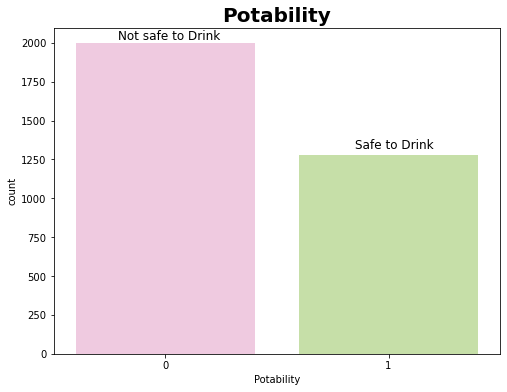

In [14]:
plt.figure(figsize=(8,6))

plt.title('Potability',size=20,weight='bold')

plt.annotate('Not safe to Drink',xy=(-0.21,2020),size=12)

plt.annotate('Safe to Drink',xy=(0.85,1320),size=12)

sns.countplot(data=dataset,x='Potability',palette='PiYG')


we can say rougly **60%** of water is **unfit** as drinking water. There is also **imbalance** in the target variables. 

Now plotting the **distribution graph** for each feature for different classes of the potability 

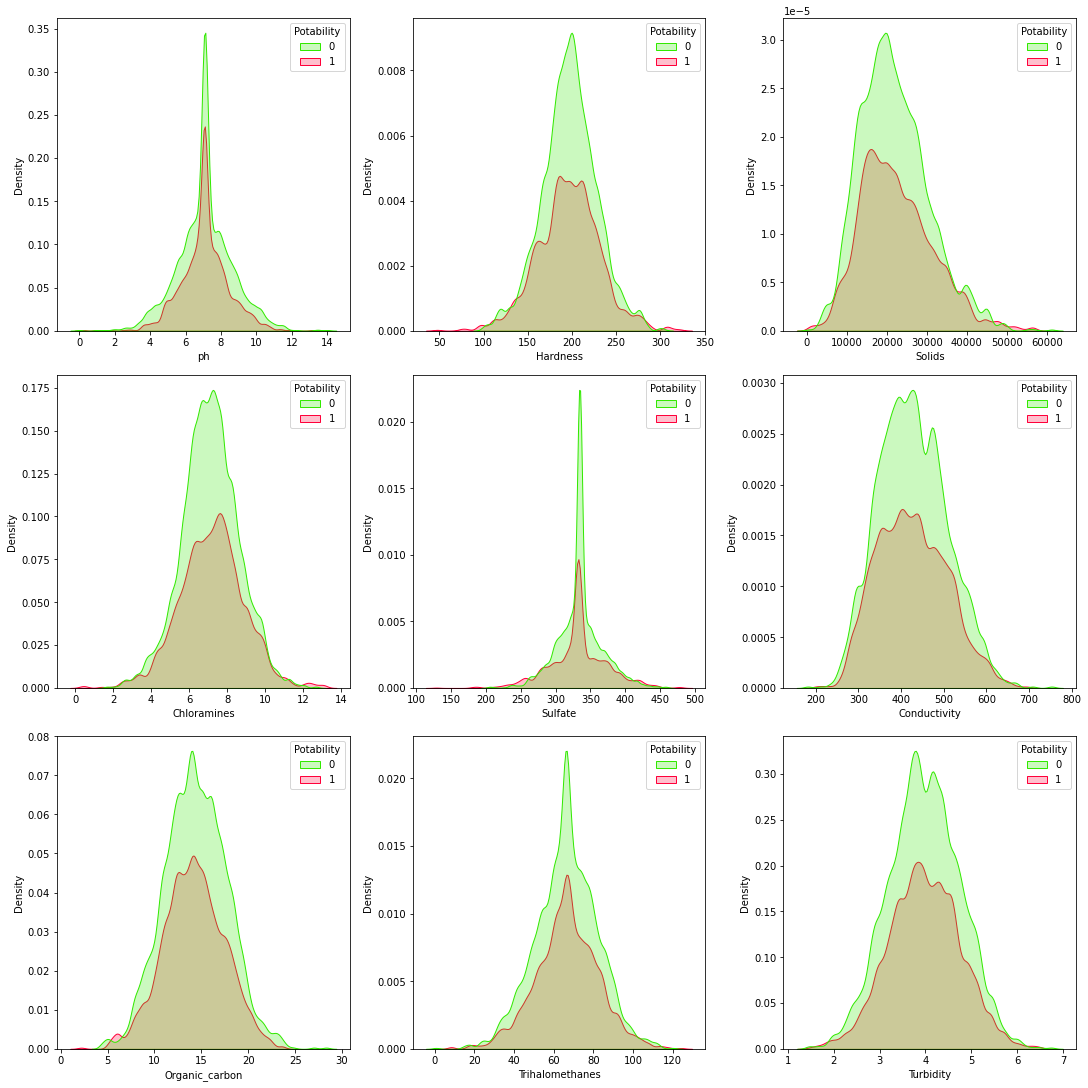

In [15]:
# creating the list containing subset of each columns having same categories i.e excluding potability  

columns=dataset.select_dtypes(exclude=['category']).columns.to_list()

# plotting the distr

fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
ax=ax.flatten()

for x,i in enumerate(columns):
    
    sns.kdeplot(data=dataset, x=i, hue='Potability',ax=ax[x],fill=True,palette='prism',bw_adjust=0.5)
    

from the above graph we can conclude that the non-potable water is more distributed on conductivity as compared to potable water, same is with turbidity and trihalomethanes but on the other hand the remaining other shows no significant difference. this can be iterepeted as the probablity of finding non-potable increases as we go away from the mean of the features contivity, trihalomethanes, turbidity and probablity of finding potable water will increase if we go away from the mean of the remaining features

lets confirm our hypothesis again by ploting the box plot. We can do that by looking at the outliers. 

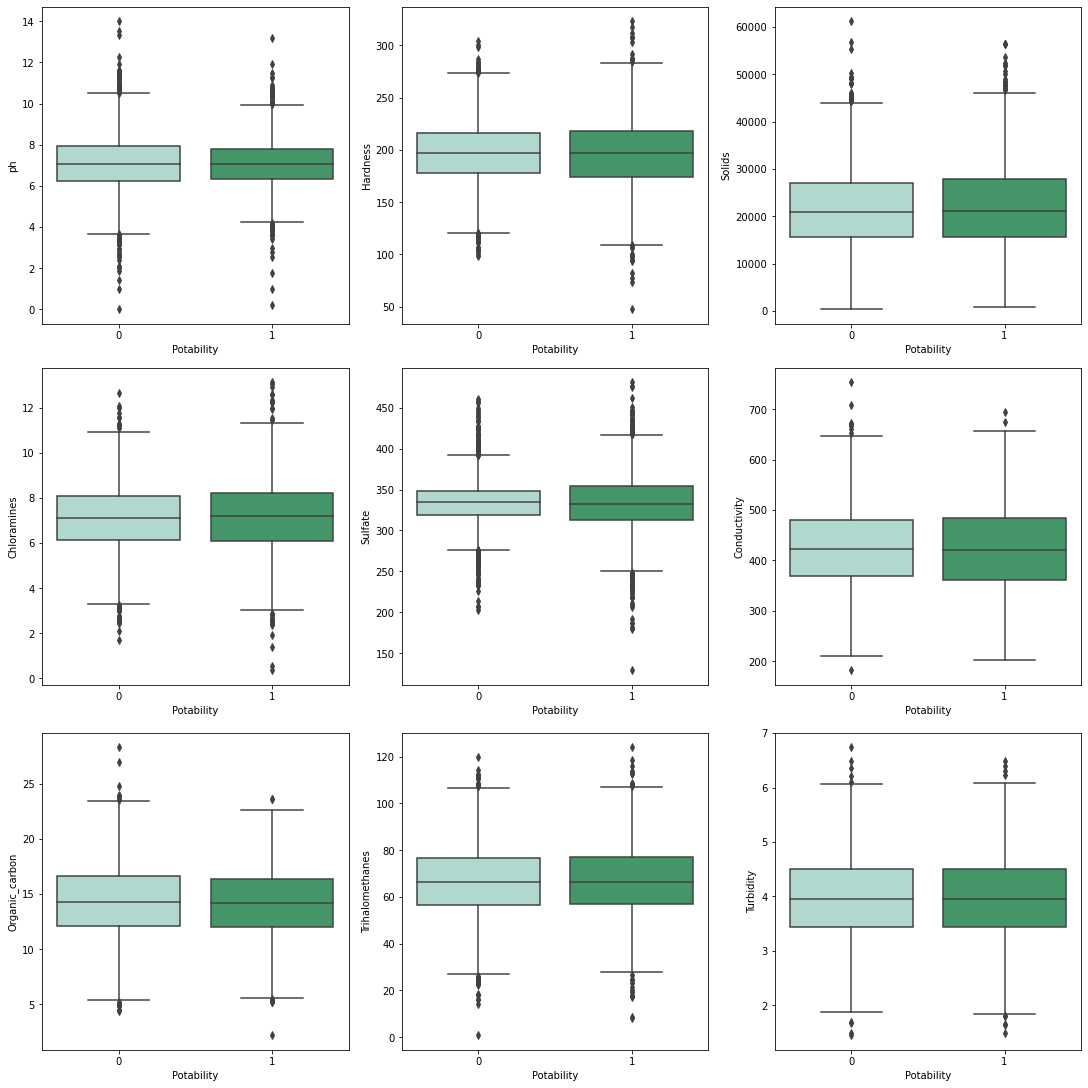

In [16]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
ax=ax.flatten()
for x,i in enumerate(columns):
    sns.boxplot(data=dataset,y=i,x='Potability',ax=ax[x],palette='BuGn')
    

we confirmed our hypothesis by looking at the outliers. The more distributed the data the the more distributed the outliers will be. To further prove the hypothesis we can do hypothesis testing and compute P-value etc..   

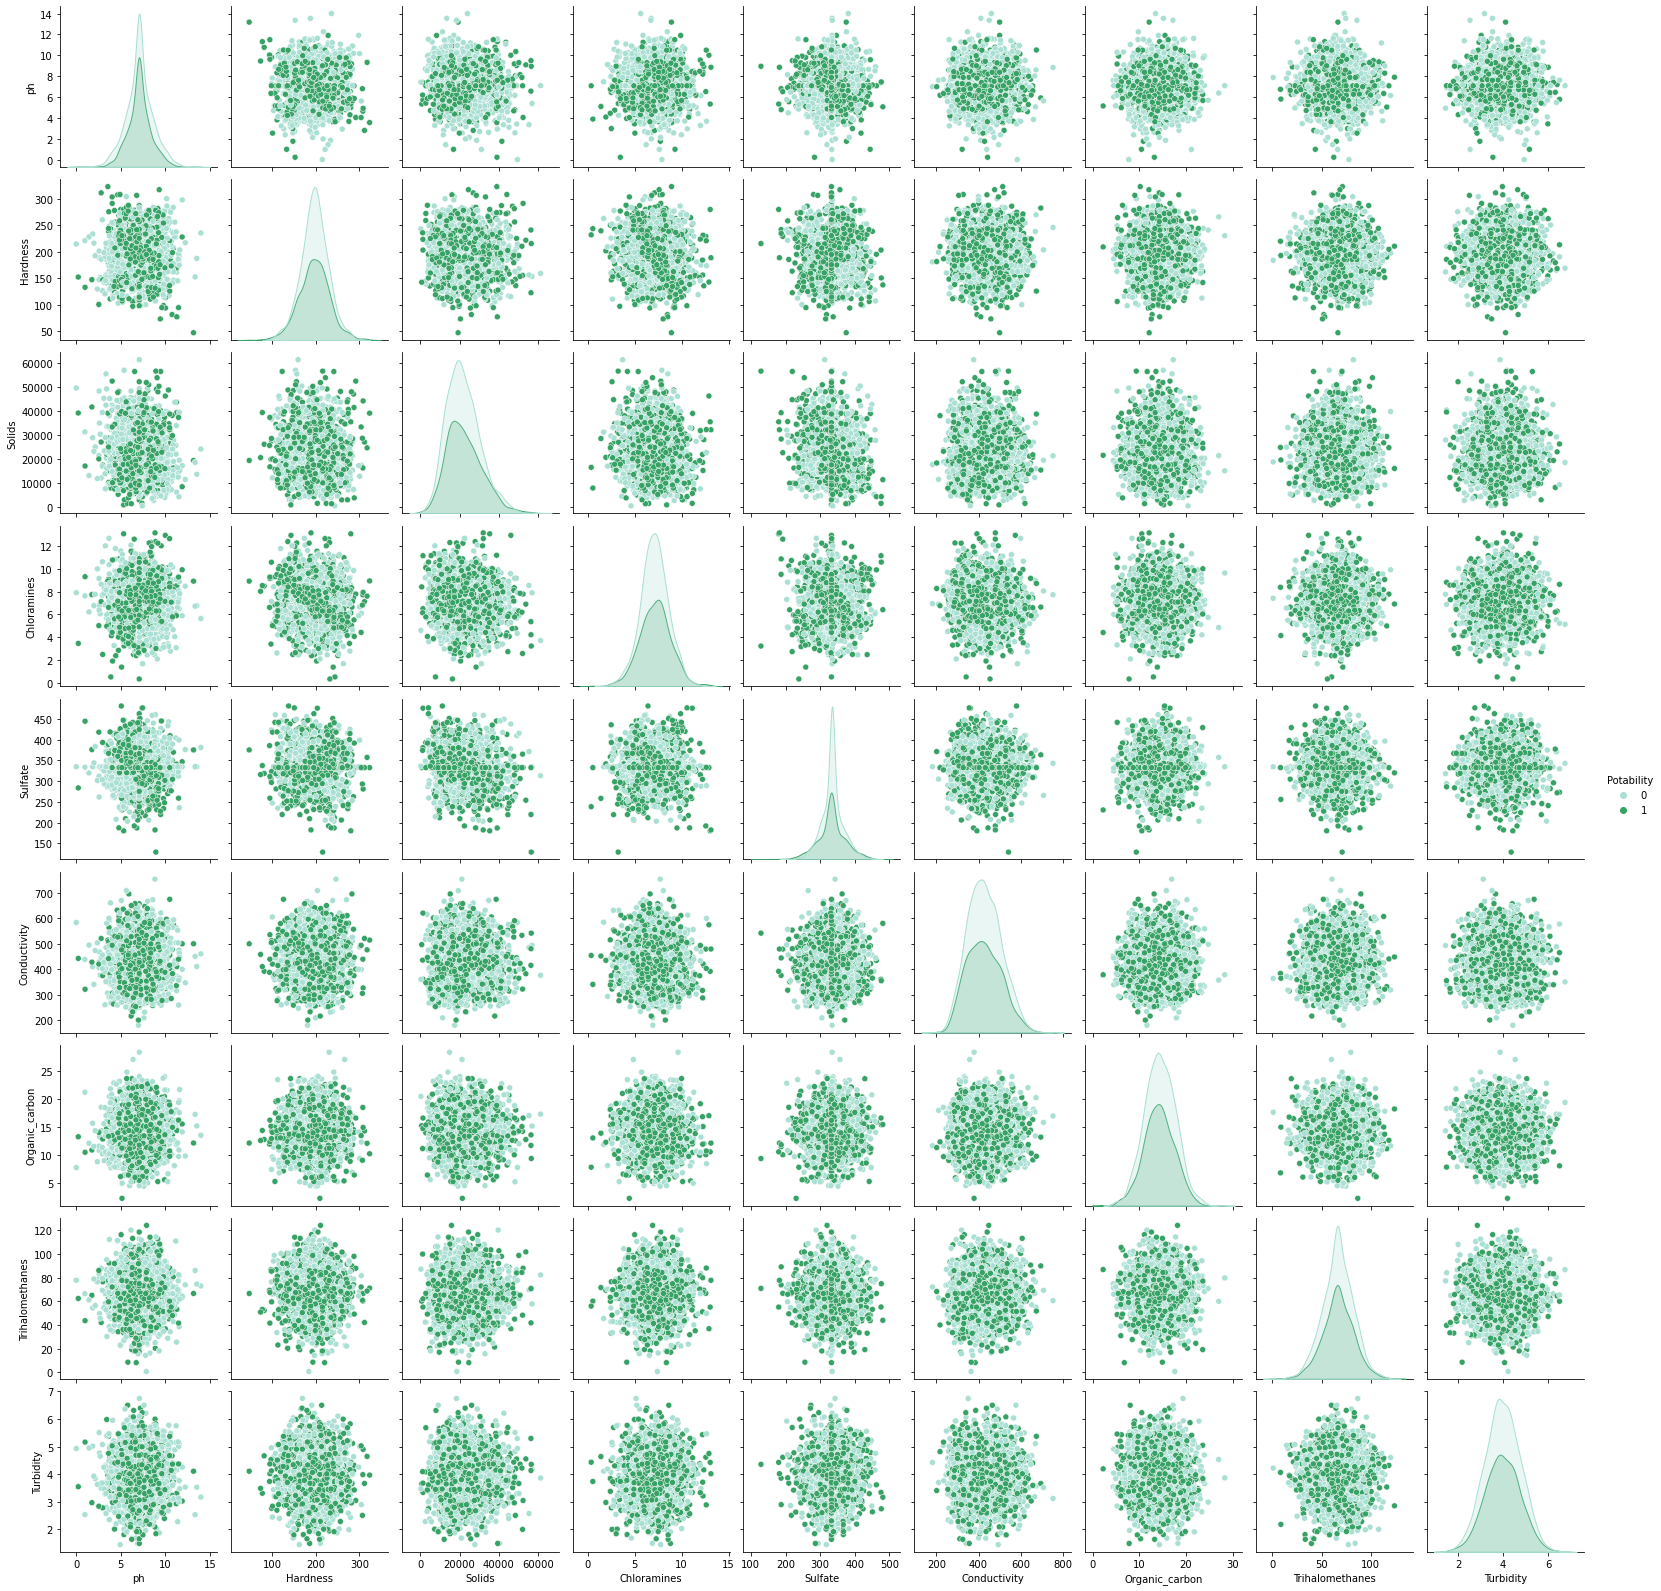

In [17]:
sns.pairplot(data=dataset,hue='Potability',kind='scatter',palette='BuGn')

<AxesSubplot:>

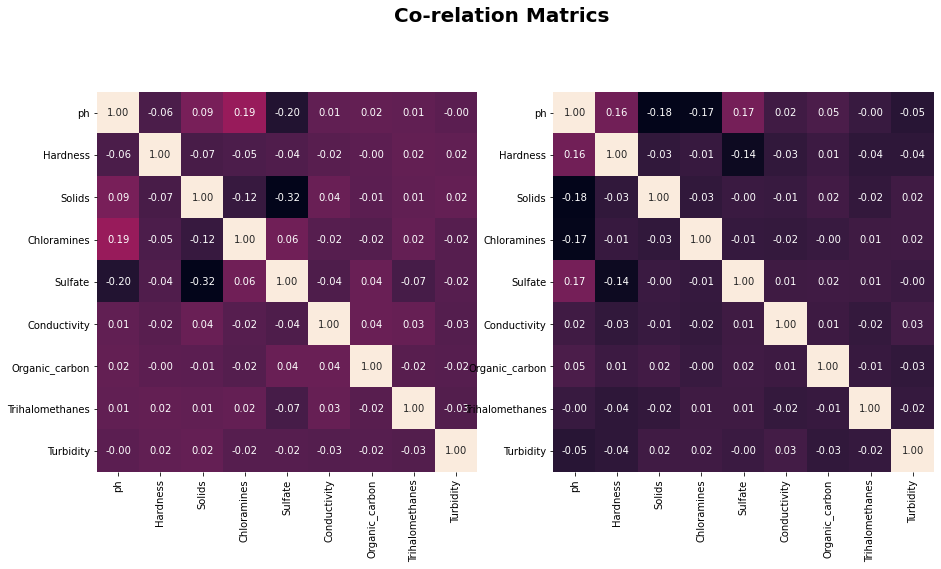

In [18]:
#plotting the correaltaion matrix. 
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(dataset[dataset['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(dataset[dataset['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

The above matrix shoes that there is **no linear relationship** between the features, so linear model **will not** work on this. 

### Handling Imbalanced in data and scaling 
Need to balance the data as target variable is imbalanced as 60%-40%. By balencing I mean to oversample in minority class in training dataset prior to fitting a model 
This can balance the class but will not provide any additional information. This is the one way to do this. the most widely used techniques to synthesize new examples is called the **Synthetic Minority Oversample Technique** or **SMOTE**

**SMOTE** works by selecting examples that are close in feature space drawing a new line between the examples in the feature space and drawing a new sample at a point along that line.


In [20]:
# this step is balance the target variable using SMOTE
sample=SMOTE()
X=dataset.drop(['Potability'],axis=1)
y=dataset['Potability']
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =sample.fit_resample(X_train,y_train)

# scaling the data using standardScaler()
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [21]:
# Using number of classifier and crossvalidation to select the best classifier using cv score and accuracy score.  
model=[DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
cv_score=[]
model_lists=[]
Accuracy_score=[]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    model_lists.append(m)
    model_name=m
    model_name.fit(X_train,y_train)
    Accuracy_score.append(accuracy_score(y_test,model_name.predict(X_test)))


model_df=pd.DataFrame(columns=['model','cv_score','Accuracy score'])
model_df['model']=model_lists
model_df['cv_score']=cv_score
model_df['Accuracy score']=Accuracy_score
model_df.sort_values(by=['cv_score','Accuracy score'], ascending=True).style.background_gradient(subset=['cv_score','Accuracy score'])


,model,cv_score,Accuracy score
2,KNeighborsClassifier(),0.647518,0.578755
0,DecisionTreeClassifier(),0.736219,0.564103
1,RandomForestClassifier(),0.786963,0.694750


from the above result the **Random Forest Classifier** performed best with average of **78%** CV_score. 
Lets try to do hypertuning for these model to increase the accuracy. 

I am using GridSearchCV to hypertune the parameters. The parameters that I am tuning are bootstrap, max_depth, max_features, min_sample_leaf, min_sample_split, n_estimator. 


In [30]:

param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto' ,'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [31]:
model=RandomForestRegressor()
grid_search=GridSearchCV(estimator=model,param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [35]:
# printing out the best parameter for the model
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [65]:
updated_model=RandomForestClassifier(n_estimators=300,max_depth=90,max_features='sqrt',min_samples_leaf=3,min_samples_split=8)
updated_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       510
           1       0.57      0.72      0.64       309

    accuracy                           0.69       819
   macro avg       0.68      0.70      0.68       819
weighted avg       0.71      0.69      0.69       819



<AxesSubplot:>

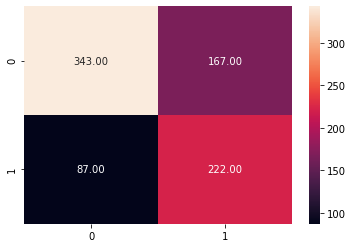

In [66]:
from sklearn.metrics import classification_report
pred=updated_model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

After hypertuning the f-1 score comes out to be around **74%** which is quite good.